<a href="https://colab.research.google.com/github/Mahrokh-Eb/Machine-Learning-With-Python/blob/master/1_1_1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
!python --version

Python 3.7.12


In [3]:
print(np.__version__)

1.19.5


In [4]:
#dir(np)

In [5]:
#help(np.where)

In [6]:
#np.where?

In [7]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [8]:
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [9]:
print(np.where(x>5, x, 0))

[[0 0 0]
 [0 0 6]
 [7 8 9]]


In [10]:
print(np.array([1,2,3]))

[1 2 3]


In [11]:
print(type)

<class 'type'>


In [12]:
print(type(x))

<class 'numpy.ndarray'>


In [13]:
A = np.array([[1,2,3], [4,5,6]])

In [14]:
print(A)

[[1 2 3]
 [4 5 6]]


In [15]:
print(type(A))

<class 'numpy.ndarray'>


In [16]:
print(A.shape)

(2, 3)


In [17]:
print(x.shape)

(3, 3)


In [18]:
print(x.shape[0])

3


In [19]:
 print(np.reshape(A, (3,2)))

[[1 2]
 [3 4]
 [5 6]]


## **Reshape a matrix from column to row vector**

In [20]:
print(np.reshape(A,(1, -1)))

[[1 2 3 4 5 6]]


In [21]:
print(np.reshape(A, (-1, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [22]:
 print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Reshape to two-dimenssion

In [23]:
y = np.array([1,2,3])

In [24]:
print(y[ None, :])

[[1 2 3]]


In [25]:
print(y[:, None])

[[1]
 [2]
 [3]]


In [26]:
print(y[:, np.newaxis])

[[1]
 [2]
 [3]]


# Array dimenssion

In [27]:
print(x.ndim)

2


In [28]:
print(y.ndim)

1


# Data type

In [29]:
print(x.dtype)

int64


In [30]:
c= np.array([1,2,3], dtype=np.float32)

In [31]:
print(c)

[1. 2. 3.]


In [32]:
print(np.arange(1, 20, step=2))

[ 1  3  5  7  9 11 13 15 17 19]


In [33]:
#np.arange?

In [34]:
print(np.linspace(1,2, num=5))

[1.   1.25 1.5  1.75 2.  ]


In [35]:
print(np.logspace(2, 5, 10, base=2))

[ 4.          5.0396842   6.34960421  8.         10.0793684  12.69920842
 16.         20.1587368  25.39841683 32.        ]


In [36]:
np.set_printoptions(formatter={'all':lambda x: '%d' %x})

In [37]:
print(np.logspace(2, 5, 10, base=2))

[4 5 6 8 10 12 16 20 25 32]


# Creating specific arrays

In [38]:
print(np.zeros(shape=(2,3), dtype=np.int32))

[[0 0 0]
 [0 0 0]]


In [39]:
print(5 * np.ones(shape=(2,3)))

[[5 5 5]
 [5 5 5]]


In [40]:
print(np.reshape(np.arange(1, 10), (3,3)))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [41]:
print(np.fliplr(np.eye(4,4)))

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


# Create random arrays

In [42]:
print(np.random.randn(3,3))

[[-1 0 0]
 [0 1 1]
 [0 -1 0]]


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

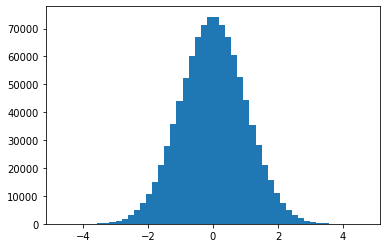

In [44]:
 x = np.random.randn(1000000)
 plt.hist(x, bins=50);

In [45]:
print(np.count_nonzero(np.random.randint(6, size=(2, 4))))

8


In [46]:
help(np.abs)

Help on ufunc object:

absolute = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate ar